<a href="https://colab.research.google.com/github/AvirupVIP/Online-Retail-Sales-Customer-Analysis/blob/main/Online_RetailSales_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving online_retail.csv.zip to online_retail.csv.zip


In [5]:
df = pd.read_csv("online_retail.csv.zip", encoding="ISO-8859-1")
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [7]:
df = df.dropna(subset=['CustomerID'])            #Remove missing CustomerID

In [8]:
df = df[df['Quantity'] > 0]                      #Remove cancelled orders

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])       #Convert InvoiceDate to datetime

In [10]:
df.drop_duplicates(inplace=True)                           #Removing Duplicates

In [11]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']         #Adding TotalPrice column

In [25]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


## EDA

In [12]:
total_revenue = df['TotalPrice'].sum()
total_orders = df['InvoiceNo'].nunique()
total_customers = df['CustomerID'].nunique()

total_revenue, total_orders, total_customers


(np.float64(8911407.904), 18536, 4339)

##Top Products

In [13]:
top_products = (
    df.groupby('Description')['TotalPrice']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_products


,TotalPrice
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93


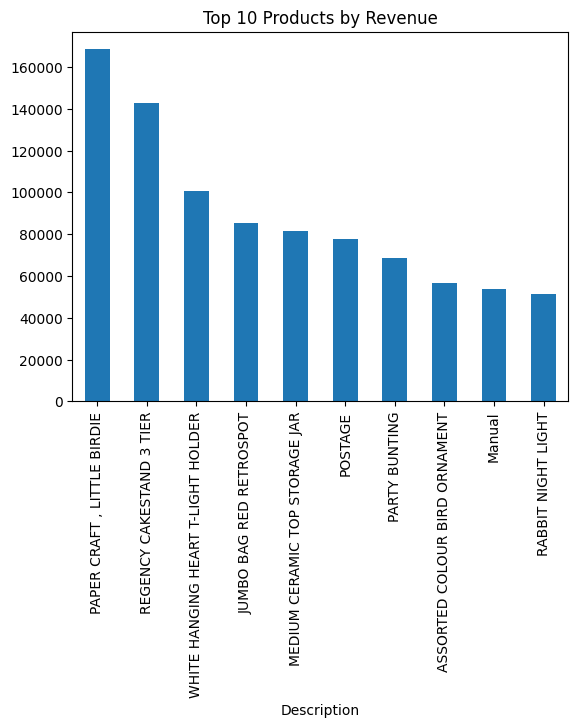

In [14]:
top_products.plot(kind='bar', title='Top 10 Products by Revenue')
plt.show()

##Time-Based Analysis (Monthly Sales)

In [15]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['TotalPrice'].sum()
monthly_sales


,TotalPrice
Month,
2010-12,572713.890
2011-01,569445.040
2011-02,447137.350
2011-03,595500.760
2011-04,469200.361
2011-05,678594.560
2011-06,661213.690
2011-07,600091.011
2011-08,645343.900


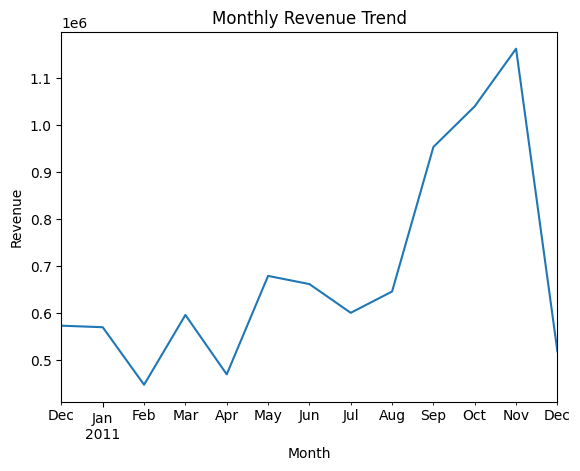

In [16]:
monthly_sales.plot(kind='line', title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


##Country-Wise Analysis

In [17]:
country_sales = (
    df.groupby('Country')['TotalPrice']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

country_sales


,TotalPrice
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050
Australia,138521.310
Spain,61577.110
Switzerland,56443.950
Belgium,41196.340


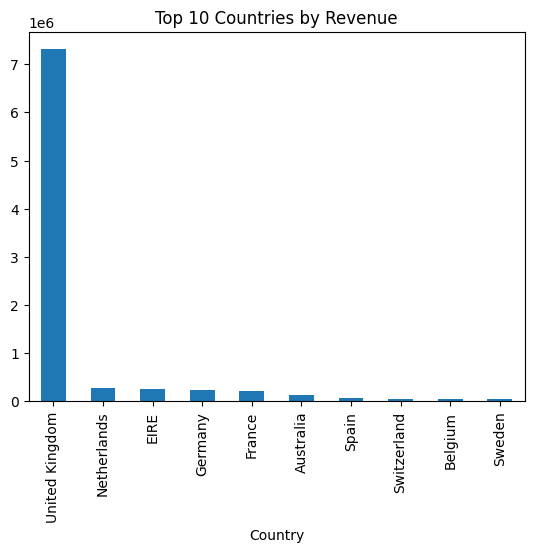

In [18]:
country_sales.plot(kind='bar', title='Top 10 Countries by Revenue')
plt.show()

##Customer Analysis

In [19]:
customer_revenue = (
    df.groupby('CustomerID') ['TotalPrice']
      .sum()
      .sort_values(ascending=False)
)

customer_revenue.head()

,TotalPrice
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06


##Repeat customers

In [20]:
repeat_customers = (
    df.groupby('CustomerID')['InvoiceNo']
      .nunique()
      .sort_values(ascending=False)
)

repeat_customers.head()


,InvoiceNo
CustomerID,
12748.0,210
14911.0,201
17841.0,124
13089.0,97
14606.0,93


##RFM (Recency,Frequency, Monetary) Analysis

In [26]:
latest_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [27]:
df.to_csv("cleaned_online_retail.csv", index=False)           #To create a clean CSV file